# Proyecto de análisis de tarifas de operador para ajustar el presupuesto de publicidad

## Enfoque: análisis estadístico de datos con pruebas de hipotesis


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.



El propósito del proyecto es aplicar los conocimientos adquiridos en los sprints en un caso lo más real posible, en este caso para determinar una decisión de negocio basada en el ánalisis estadístico de un conjunto de datos para elegir el plan que genera mayores ingresos a Megaline y dar prioridad en la publicidad del que resulte.

Planeo:
- Preparar los datos, en cuestión de limpieza si fuera necesario, si no con una verificación,
- Corregir otros problemas en los datos en cuestiones como formatos.
- Agregar otra información que pudiera ser de utilidad para el análisis.
- Hacer las uniones de tablas que se requieran para poder procesar mejor los datos.
- Realizar una visualización de los datos con gráficos, para un mejor analisis.
- Analizar lo realizado
- Aplicar la estadistica descriptiva para analizar los resultados.



## Inicialización

In [ ]:
# Cargar todas las librerías necesarias


import pandas as pd
import numpy  as np

from matplotlib import pyplot as plt
from scipy      import stats  as st


## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames

megaline_calls_url = 'https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_Sprint_3/megaline_calls.csv'
megaline_internet_url = 'https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_Sprint_3/megaline_internet.csv'
megaline_messages_url = 'https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_Sprint_3/megaline_messages.csv'
megaline_plans_url = 'https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_Sprint_3/megaline_plans.csv'
megaline_users_url = 'https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_Sprint_3/megaline_users.csv'


megaline_calls = pd.read_csv(megaline_calls_url)
megaline_internet = pd.read_csv(megaline_internet_url)
megaline_messages = pd.read_csv(megaline_messages_url)
megaline_plans = pd.read_csv(megaline_plans_url)
megaline_users = pd.read_csv(megaline_users_url)



## Preparar los datos

Uso de .head() y .describe() para obtener información de los dataframes

In [ ]:
megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
megaline_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [ ]:
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [ ]:
megaline_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [ ]:
megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
megaline_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [ ]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
megaline_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [ ]:
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [ ]:
megaline_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
# Imprime una muestra de los datos para las tarifas

megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate




- No hay datos ausentes

- No hay duplicados

- Los tipos de datoson adecuados

### Corregir datos

In [ ]:
#No hay correcciones en este dataframe

### Enriquecer los datos

In [1]:
#No hay agregación de datos en este dataframe

## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Imprime una muestra de datos para usuarios

display( megaline_users.head() )

# Verificando duplicados
usersdup = ( megaline_users [ megaline_users.duplicated() == True ] )

print( usersdup )

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []




- Datos ausentes en churn_date, que aclara la info del conjunto su significado
- Sin duplicados
- Reg_date y churn_date pueden cambiarse a tipo datatime
- Se puede agregar columna de mes de registro

### Corregir los datos

In [ ]:
# Conversión de tipo de datos a datetime

megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'])

megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'])

megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

In [ ]:
# Adición de columna de mes

megaline_users['reg_month'] = megaline_users.reg_date.dt.month

megaline_users['churn_month'] = megaline_users.churn_date.dt.month

megaline_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,NaN


## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
# Imprime una muestra de datos para las llamadas

display(megaline_calls.head())

# Verificando duplicados
callsdup = ( megaline_calls [ megaline_calls.duplicated()] )

print(callsdup)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []



- No hay datos ausentes, ni duplicados
- call_date puede cambiarse a tipo datatime
- duration puede convertirse a minutos, segundos

### Corregir los datos

In [ ]:
# Conversión de tipo de datos a datetime

megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'])
print(megaline_calls.info())

# Cerrando los datos de duración al siguiente número entero

megaline_calls['duration'] = megaline_calls['duration'].apply(np.ceil)
display(megaline_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


### Enriquecer los datos

In [ ]:
# Adición de columna de mes

megaline_calls['call_month'] = megaline_calls.call_date.dt.month

display(megaline_calls.head())

print( megaline_calls['call_month'].unique() )

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


[12  9 10 11  8  7  6  5  3  4  2  1]


## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Imprime una muestra de datos para los mensajes

megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26




- Sin datos nulos ni duplicados
- message_date puede convertirse a formato datetime




### Corregir los datos

In [ ]:
# Conversipon de tipo de dato a datetime

megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'])

# Verificando duplicados
msg_dup = megaline_messages[megaline_messages.duplicated()]

megaline_messages.info()

print( f' \n {msg_dup}' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
 
 Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


### Enriquecer los datos

In [ ]:
# Adición de columna de mes

megaline_messages['message_month'] = megaline_messages.message_date.dt.month

display(megaline_messages.head())


,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet

megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Imprime una muestra de datos para el tráfico de internet

megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



- Sin datos nulos ni duplicados
- session_date puede convertirse a formato datetime
- Con mb_used crear columna convirtiendo a gb, para redondear al siguiente entero en gb en el total mensual, como se indica.

### Corregir los datos

In [ ]:
# Conversión de tipo de dato a datetime

megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'])

# Verificar duplicados
int_dup = megaline_internet[megaline_internet.duplicated()]

megaline_internet.info()

print( f' \n {int_dup} ' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
 
 Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: [] 


### Enriquecer los datos

In [ ]:
# Adición de columna de mes

megaline_internet['session_month'] = megaline_internet.session_date.dt.month

# Conversión de mb a gb para tener la unidad coincida con la de la tarifa

megaline_internet['gb_used'] = megaline_internet['mb_used'] / 1024


display(megaline_internet.head())

,id,user_id,session_date,mb_used,session_month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


## Estudiar las condiciones de las tarifas

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

megaline_plans

# - - - - Descripción de las tarifas
# Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes.
#Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo,
#   se contará como un minuto. Para tráfico web, las sesiones web individuales no se redondean.
# En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.
# A continuación puedes ver una descripción de las tarifas:
# Surf
# Pago mensual: 20$.
# 500 minutos al mes, 50 SMS y 15 GB de datos.
# Si se exceden los límites del paquete:
# 1 minuto: 3 centavos.
# 1 SMS: 3 centavos.
# 1 GB de datos: 10$.

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario



In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_user_monthly = megaline_calls.groupby(['user_id', 'call_month']).id.count().reset_index()

calls_user_monthly.rename(columns = {'call_month':'month'}, inplace = True)
calls_user_monthly.rename(columns = {'id':'calls'}, inplace = True)

calls_user_monthly

,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

min_user_monthly = megaline_calls.groupby(['user_id', 'call_month']).duration.sum().reset_index()

min_user_monthly.rename(columns = {'call_month':'month'}, inplace = True)
min_user_monthly.rename(columns = {'duration':'call_minutes'}, inplace = True)

min_user_monthly

,user_id,month,call_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

msg_user_monthly = megaline_messages.groupby(['user_id', 'message_month']).id.count().reset_index()

msg_user_monthly.rename(columns = {'message_month':'month'}, inplace = True)
msg_user_monthly.rename(columns = {'id':'messages'}, inplace = True)

msg_user_monthly

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

gbused_user_monthly = megaline_internet.groupby(['user_id','session_month']).gb_used.sum().reset_index()

gbused_user_monthly['gb_used'] = np.ceil(gbused_user_monthly['gb_used'])

gbused_user_monthly.rename(columns = {'session_month':'month'}, inplace = True)

gbused_user_monthly

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Fusion de llamadas y minutos de llamada
user_monthly = pd.merge(calls_user_monthly, min_user_monthly, how='outer', on=['user_id', 'month'] )

# Fusion con mensajes
user_monthly = pd.merge(user_monthly, msg_user_monthly, how='outer', on=['user_id', 'month'] )

# Fusion con gb utilizados
user_monthly = pd.merge(user_monthly, gbused_user_monthly, how='outer', on=['user_id', 'month'] )


user_monthly = user_monthly.fillna(value=0)

user_monthly



,user_id,month,calls,call_minutes,messages,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0
2289,1361,5,0.0,0.0,2.0,2.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,1.0


<div class="alert alert-block alert-info">
<b>Comentario:</b> <a class=“tocSkip”></a><br>
 Para la fusión de los DataFrames, se usó en un principio `reduce` para fusionar los DataFrames, se intentó lograr el mismo resultado de manera más clara y legible utilizando `pd.concat`, pensando en que esto haría el código  más fácil de entender para quienes lo lean y lo mantengan.

 Aunque con concat(), cambiaba la cantidad de filas a más de 8000 porque solo pegaba cada dataframae debajo del otro. Mejor se opta por realizar multiples fusiones con pd.merge() y así obtener la tabla que tenía anteriormente para no correr riesgo de afectar todo lo que se realizó después con esta tabla generada.

</div>

In [ ]:
# Añade la información de la tarifa

user_plans = megaline_users.merge(megaline_plans, left_on= 'plan', right_on= 'plan_name')

display(user_plans)

print('\n . \n . \n .')

user_data = user_monthly.merge(user_plans, on='user_id')

display(user_data)



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,12.0,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,8,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaT,1,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaT,12,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaT,4,NaN,50,15360,500,20,10,0.03,0.03,surf
496,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,9,NaN,50,15360,500,20,10,0.03,0.03,surf
497,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,2,NaN,50,15360,500,20,10,0.03,0.03,surf
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,2,NaN,50,15360,500,20,10,0.03,0.03,surf



 . 
 . 
 .


,user_id,month,calls,call_minutes,messages,gb_used,first_name,last_name,age,city,...,reg_month,churn_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,12,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,8,NaN,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,8,NaN,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,8,NaN,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,8,NaN,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",...,8,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
2289,1349,10,0.0,0.0,76.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,10,NaN,50,15360,500,20,10,0.03,0.03,surf
2290,1349,11,0.0,0.0,72.0,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,10,NaN,50,15360,500,20,10,0.03,0.03,surf
2291,1349,12,0.0,0.0,61.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,10,NaN,50,15360,500,20,10,0.03,0.03,surf


In [ ]:
# Calcula el ingreso mensual para cada usuario

# Calculo de precio por minutos excedentes del limite del plan

user_minutes = (user_data['minutes_included'] - user_data['call_minutes'])

display(user_minutes)

user_calls_tariff = user_minutes * user_data['usd_per_minute']
user_calls_tariff

# Con base en la operación anterior si el resultado es negativo, significa que son excendentes

tariff_call = []

for tariff in user_calls_tariff :
    if tariff >= 0 :
        tariff = tariff * 0
        tariff_call.append(tariff)
    else:
        tariff = tariff * -1
        tariff_call.append(tariff)

user_data['calls_offlimit_price'] = pd.DataFrame(tariff_call)




# Calculo de precio por mensajes excedentes del limite del plan

user_msgs_ = (user_data['messages_included'] - user_data['messages'])

display(user_msgs_)

user_msg_tariff = user_msgs_ * user_data['usd_per_message']


# Con base en la operación anterior si el resultado es negativo, significa que son excendentes

tariff_msg = []

for tariff in user_msg_tariff :
    if tariff >= 0 :
        tariff = tariff * 0
        tariff_msg.append(tariff)
    else:
        tariff = tariff * -1
        tariff_msg.append(tariff)

user_data['msgs_offlimit_price'] = pd.DataFrame(tariff_msg)




# Calculo de precio por mb excedentes del limite del plan

user_gbs = ( (user_data['mb_per_month_included'] / 1024) - user_data['gb_used'] )

display(user_gbs)

user_gb_tariff = user_gbs * user_data['usd_per_gb']


# Con base en la operación anterior si el resultado es negativo, significa que son excendentes

tariff_gb = []

for tariff in user_gb_tariff :
    if tariff >= 0 :
        tariff = tariff * 0
        tariff_gb.append(tariff)
    else:
        tariff = tariff * -1
        tariff_gb.append(tariff)

user_data['gb_offlimit_price'] = pd.DataFrame(tariff_gb)


# Calculo de precio final a pagar por usuario

user_final = user_data['usd_monthly_pay'] + user_data['calls_offlimit_price'] + user_data['msgs_offlimit_price'] + user_data['gb_offlimit_price']

user_data['user_total_pay'] = pd.DataFrame(user_final)

display(user_data)


0       2876.0
1        318.0
2        185.0
3        107.0
4         74.0
         ...  
2288    3000.0
2289     500.0
2290     500.0
2291     500.0
2292    3000.0
Length: 2293, dtype: float64

0        989.0
1         20.0
2          6.0
3         -3.0
4         14.0
         ...  
2288     922.0
2289     -26.0
2290     -22.0
2291     -11.0
2292    1000.0
Length: 2293, dtype: float64

0       28.0
1        8.0
2        1.0
3       -7.0
4       -4.0
        ... 
2288    -6.0
2289     2.0
2290    -2.0
2291     2.0
2292    29.0
Length: 2293, dtype: float64

,user_id,month,calls,call_minutes,messages,gb_used,first_name,last_name,age,city,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,calls_offlimit_price,msgs_offlimit_price,gb_offlimit_price,user_total_pay
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.00,0.0,70.00
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.0,0.00,0.0,20.00
2,1001,9,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.0,0.00,0.0,20.00
3,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.0,0.09,70.0,90.09
4,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.00,42.0,112.00
2289,1349,10,0.0,0.0,76.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,500,20,10,0.03,0.03,surf,0.0,0.78,0.0,20.78
2290,1349,11,0.0,0.0,72.0,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,500,20,10,0.03,0.03,surf,0.0,0.66,20.0,40.66
2291,1349,12,0.0,0.0,61.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,500,20,10,0.03,0.03,surf,0.0,0.33,0.0,20.33


## Estudia el comportamiento de usuario

### Llamadas

plan_name,month,surf,ultimate
0,1,203.000000,193.500000
1,2,297.000000,403.142857
2,3,330.000000,304.250000
3,4,351.540000,336.857143
4,5,399.584416,406.241379
5,6,431.298969,370.957447
6,7,449.983471,427.067797
7,8,410.111111,421.436620
8,9,414.226804,437.511628
9,10,429.729958,450.735849


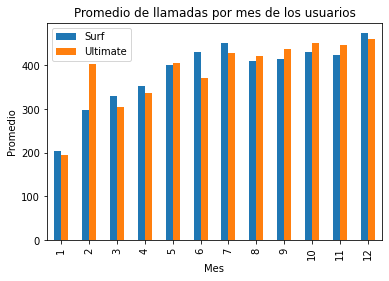

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar por plan y mes
call_duration_mean = user_data.groupby(['plan_name','month']).call_minutes.agg(['mean']).reset_index()

# Cambiar valores de planes a columnas que tengan de valores los promedios por mes

call_duration_mean = (call_duration_mean.pivot_table(values= 'mean', index='month', columns='plan_name', aggfunc='first'))

call_duration_mean = call_duration_mean.reset_index()

display(call_duration_mean)

#Gráfico de barras

call_duration_mean.plot(x='month',
        kind='bar',
        title='Promedio de llamadas por mes de los usuarios',
        xlabel='Mes',
        ylabel='Promedio')

plt.legend(['Surf', 'Ultimate'])
plt.show()

plan_name,month,surf,ultimate
0,1,406.0,774.0
1,2,2673.0,2822.0
2,3,7590.0,3651.0
3,4,17577.0,7074.0
4,5,30768.0,11781.0
5,6,41836.0,17435.0
6,7,54448.0,25197.0
7,8,66438.0,29922.0
8,9,80360.0,37626.0
9,10,101846.0,47778.0


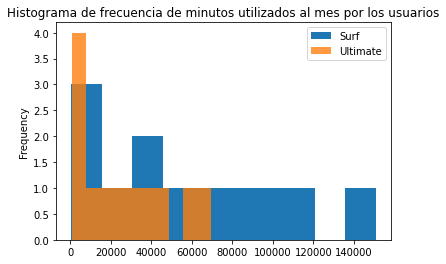

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar por plan y mes
call_duration_sum = user_data.groupby(['plan_name','month']).call_minutes.agg(['sum']).reset_index()

# Cambiar valores de planes a columnas que tengan de valores de la suma de minutos por mes

call_duration_sum = (call_duration_sum.pivot_table(values= 'sum', index='month', columns='plan_name', aggfunc='first')).reset_index()

display(call_duration_sum)

# Histograma

call_duration_sum['surf'].plot(
        kind='hist',
        title='Histograma de frecuencia de minutos utilizados al mes por los usuarios')

call_duration_sum['ultimate'].plot(
        kind='hist', alpha= 0.8)

plt.legend(['Surf', 'Ultimate'])
plt.show()

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.

call_duration_mean_monthly = np.mean(call_duration_sum.loc[:, 'surf':'ultimate'] )

display(call_duration_mean_monthly)

call_duration_variance = np.var(call_duration_sum.loc[:, 'surf':'ultimate'])

display(call_duration_variance)


plan_name
surf        56201.916667
ultimate    25827.000000
dtype: float64

plan_name
surf        2.202716e+09
ultimate    4.784629e+08
dtype: float64

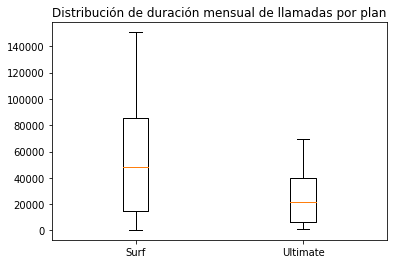

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas


plt.boxplot(call_duration_sum.loc[:, 'surf':'ultimate'])

plt.title("Distribución de duración mensual de llamadas por plan")

plt.xticks([1,2],['Surf','Ultimate'])

plt.show()


- El plan surf es más popular que el plan ultimate, por lo tanto, se espera mayor actividad de los usuarios y los gráficos claramente lo reflejan con mas de 150,000 minutos vs 69000 del plan ultimate en sus valores maximos en el mes de diciembre. El comportamiento de llamadas de los usuarios sí varía por el plan.

### Mensajes

plan_name,month,surf,ultimate
0,1,21.0,62.0
1,2,108.0,151.0
2,3,351.0,243.0
3,4,870.0,463.0
4,5,1849.0,931.0
5,6,2454.0,1379.0
6,7,3271.0,1937.0
7,8,4662.0,2732.0
8,9,5968.0,3259.0
9,10,8020.0,4181.0


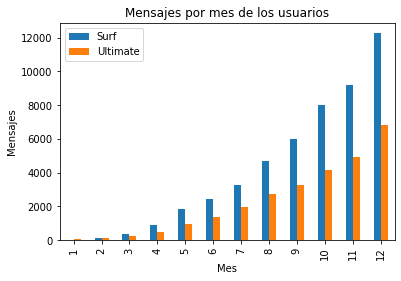

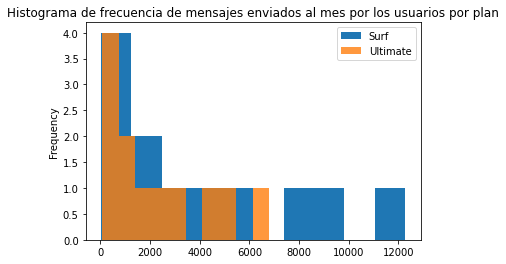

'Promedio:'

plan_name
surf        4084.500000
ultimate    2253.083333
dtype: float64

'Varianza:'

plan_name
surf        1.476495e+07
ultimate    4.307876e+06
dtype: float64

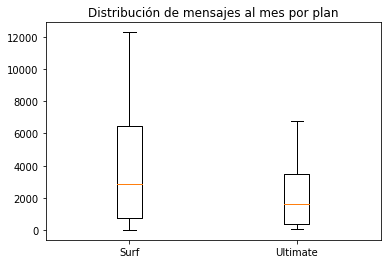

In [ ]:
#Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

messages_monthly_sum = user_data.groupby(['plan_name','month']).messages.agg(['sum']).reset_index()

#Cambiar valores de planes a columnas que tengan de valores de la suma de mensajes por mes

messages_monthly_sum = (messages_monthly_sum.pivot_table(values= 'sum', index='month', columns='plan_name', aggfunc='first')).reset_index()

display(messages_monthly_sum)

#Gráfico de barras

messages_monthly_sum.plot(x='month',
        kind='bar',
        title='Mensajes por mes de los usuarios',
        xlabel='Mes',
        ylabel='Mensajes')

plt.legend(['Surf', 'Ultimate'])
plt.show()


# Histograma

messages_monthly_sum['surf'].plot(
        kind='hist',
        title='Histograma de frecuencia de mensajes enviados al mes por los usuarios por plan')

messages_monthly_sum['ultimate'].plot(
        kind='hist', alpha= 0.8)

plt.legend(['Surf', 'Ultimate'])
plt.show()


# Promedio y varianza

messages_monthly_mean = np.mean(messages_monthly_sum.loc[:, 'surf':'ultimate'] )

display('Promedio:', messages_monthly_mean)

messages_monthly_variance = np.var(messages_monthly_sum.loc[:, 'surf':'ultimate'])

display('Varianza:', messages_monthly_variance)

# Diagrama de caja

plt.boxplot(messages_monthly_sum.loc[:, 'surf':'ultimate'])

plt.title("Distribución de mensajes al mes por plan")

plt.xticks([1,2],['Surf','Ultimate'])

plt.show()



Los que tienen Surf tienen una actividad aproximadamente del doble que los del plan Ultimate, también se nota en el promedio y la varianza, por los valores de varianza se entiende que la actividad en el plan surf está mas dispersa de su media que la actividad de los usuarios ultimate. Por lo tanto, el comportamiento de los usuarios sí varia en función del plan.

### Internet

plan_name,month,surf,ultimate
0,1,10.0,29.0
1,2,110.0,121.0
2,3,312.0,221.0
3,4,611.0,343.0
4,5,1087.0,489.0
5,6,1502.0,725.0
6,7,2042.0,973.0
7,8,2735.0,1267.0
8,9,3238.0,1463.0
9,10,4126.0,1878.0


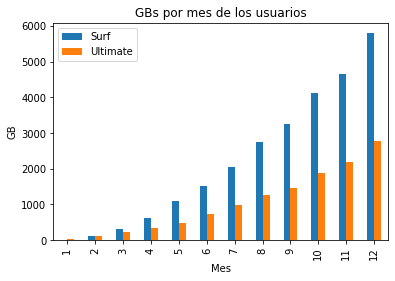

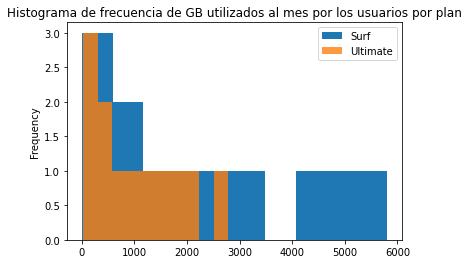

'Promedio:'

plan_name
surf        2185.250000
ultimate    1038.416667
dtype: float64

'Varianza:'

plan_name
surf        3.419803e+06
ultimate    7.224866e+05
dtype: float64

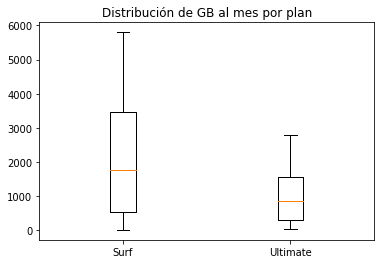

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

gb_monthly_sum = user_data.groupby(['plan_name','month']).gb_used.agg(['sum']).reset_index()

#Cambiar valores de planes a columnas que tengan de valores de la suma de gb por mes

gb_monthly_sum = (gb_monthly_sum.pivot_table(values= 'sum', index='month', columns='plan_name', aggfunc='first')).reset_index()

display(gb_monthly_sum)

#Gráfico de barras

gb_monthly_sum.plot(x='month',
        kind='bar',
        title='GBs por mes de los usuarios',
        xlabel='Mes',
        ylabel='GB')

plt.legend(['Surf', 'Ultimate'])
plt.show()


# Histograma

gb_monthly_sum['surf'].plot(
        kind='hist',
        title='Histograma de frecuencia de GB utilizados al mes por los usuarios por plan')

gb_monthly_sum['ultimate'].plot(
        kind='hist', alpha= 0.8)

plt.legend(['Surf', 'Ultimate'])
plt.show()


# Promedio y varianza

gb_monthly_mean = np.mean(gb_monthly_sum.loc[:, 'surf':'ultimate'] )

display('Promedio:', gb_monthly_mean)

gb_monthly_variance = np.var(gb_monthly_sum.loc[:, 'surf':'ultimate'])

display('Varianza:', gb_monthly_variance)

# Diagrama de caja

plt.boxplot(gb_monthly_sum.loc[:, 'surf':'ultimate'])

plt.title("Distribución de GB al mes por plan")

plt.xticks([1,2],['Surf','Ultimate'])

plt.show()



El comportamiento de los usuarios si varia en función del plan, ya que los que tienen Surf tienen una actividad del doble que los del plan Ultimate que incluso se deja notar en el promedio y la varianza, y por los valores de esta ultima se puede interpretar que la actividad en el plan surf está mas dispersa de su media que la actividad de los usuarios ultimate.

## Ingreso

plan_name,month,surf,ultimate
0,1,40.00,280.0
1,2,309.57,490.0
2,3,1056.65,896.0
3,4,2035.53,1533.0
4,5,3667.37,2051.0
5,6,4779.80,3367.0
6,7,7583.56,4242.0
7,8,10356.85,5173.0
8,9,11304.67,6195.0
9,10,15504.83,7665.0


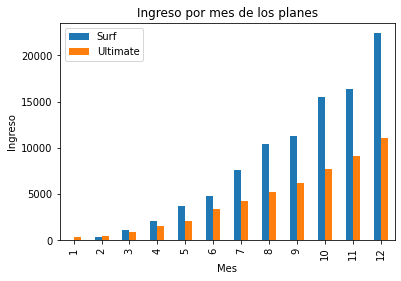

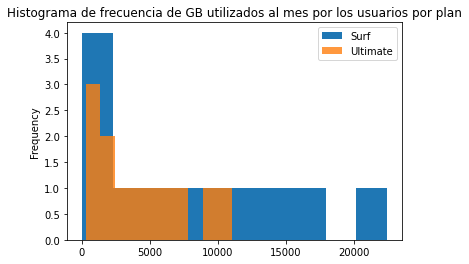

'Promedio:'

plan_name
surf        7957.598333
ultimate    4338.833333
dtype: float64

'Varianza:'

plan_name
surf        4.896895e+07
ultimate    1.170081e+07
dtype: float64

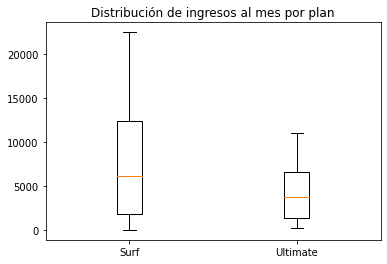

In [ ]:

plan_income_sum = user_data.groupby(['plan_name','month']).user_total_pay.agg(['sum']).reset_index()

#Cambiar valores de planes a columnas que tengan de valores de la suma de ingresos por mes

plan_income_sum = (plan_income_sum.pivot_table(values= 'sum', index='month', columns='plan_name', aggfunc='first')).reset_index()

display(plan_income_sum)

#Gráfico de barras

plan_income_sum.plot(x='month',
        kind='bar',
        title='Ingreso por mes de los planes',
        xlabel='Mes',
        ylabel='Ingreso')

plt.legend(['Surf', 'Ultimate'])
plt.show()


# Histograma

plan_income_sum['surf'].plot(
        kind='hist',
        title='Histograma de frecuencia de GB utilizados al mes por los usuarios por plan')

plan_income_sum['ultimate'].plot(
        kind='hist', alpha= 0.8)

plt.legend(['Surf', 'Ultimate'])
plt.show()


# Promedio y varianza

plan_income_mean = np.mean(plan_income_sum.loc[:, 'surf':'ultimate'] )

display('Promedio:', plan_income_mean)

plan_income_variance = np.var(plan_income_sum.loc[:, 'surf':'ultimate'])

display('Varianza:', plan_income_variance)

# Diagrama de caja

plt.boxplot(plan_income_sum.loc[:, 'surf':'ultimate'])

plt.title("Distribución de ingresos al mes por plan")

plt.xticks([1,2],['Surf','Ultimate'])

plt.show()

In [ ]:
users_surf = user_data[user_data['plan'] == 'surf']['plan'].count()

print( f'Users Surf: {users_surf}')

users_ultimate = user_data[user_data['plan'] == 'ultimate']['plan'].count()

print( f'Users Ultimate: {users_ultimate}' )

Users Surf: 1573
Users Ultimate: 720


In [ ]:
# Calculo de ganacia esperada (sin recagos por exceso), multiplicada por tarifa de plan y los 12 meses del 2018

expected_income_surf  = users_surf * 20 * 12

expected_income_ultimate = users_ultimate * 70 * 12


print( 'Ingresos esperados de plan surf:', expected_income_surf  )

print( 'Ingresos esperados de plan ultimate:', expected_income_ultimate )


Ingresos esperados de plan surf: 377520
Ingresos esperados de plan ultimate: 604800




Sobre el ingreso entre planes, el plan surf tiene más ingresos que el plan ultimate, esto se nota por el promedio de ingresos del plan surf, también porque el numero de usuarios que tienen el plan surf es ligeramente más el doble que los usuarios ultimate, pero también es notable que muchos de los ingresos del plan surf son por los recargos a los usuarios que exceden los limites de su tarifa.

## Prueba las hipótesis estadísticas



Hipotesis nula: Los ingresos promedio de los planes ultimate y surf son iguales

Hipotesis alternativa: Los ingresos promedio de los planes ultimate y surf son diferentes

In [ ]:
# Prueba las hipótesis

users_surf_income = user_data[user_data['plan'] == 'surf']['user_total_pay']
users_ultimate_income = user_data[user_data['plan'] == 'ultimate']['user_total_pay']

alpha = 0.05

results = st.ttest_ind(users_surf_income, users_ultimate_income)
print( f'valor p: {results.pvalue}' )


if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")



valor p: 2.862674510698644e-08
Rechazamos la hipótesis nula


In [ ]:
# Filtrando tabla (series) para los ingresos del área de NY-NJ y otra para el resto de regiones.

ny_nj_income = user_data[user_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA' ] ['user_total_pay']

other_regions_income = user_data[user_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA' ] ['user_total_pay']



Hipotesis nula: El ingreso promedio de los usuarios del área NY-NJ son iguales al de otras regiones.

Hipotesis alternativa: El ingreso promedio de los usuarios del área NY-NJ son diferentes al de otras regiones.

In [ ]:
# Prueba las hipótesis

alpha1 = 0.05

results1 = st.ttest_ind(ny_nj_income, other_regions_income)
print('valor p: ', results1.pvalue)


if results1.pvalue < alpha1:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  0.043557431621342436
Rechazamos la hipótesis nula


<div class="alert alert-block alert-danger">
    <b>Comentario</b> <a class="tocSkip"></a><br>
Se plantearon claramente las hipótesis nulas y alternativas, y se ha utilizado el nivel de significancia (alpha) de 0.05, lo cual es una elección común en la investigación estadística.

En su momento se notó que hubo un pequeño error en la segunda prueba de hipótesis. Cuando al calcular el valor p en la segunda prueba, se estaba utilizando `results.pvalue` nuevamente en lugar de `results1.pvalue`.
Es importante registrar este suceso para recordar que hay que asegurarse de utilizar la variable correcta para obtener los resultados correctos, ya que puede representar alguna diferencia considerable y afectar conclusiones que ya tenía previamente

</div>


## Conclusión general


El plan surf, en general, dobla al plan ultimate en cuestión de ingresos, duración de llamadas, mensajes, gb utilizados

Se utiliza una prueba bilateral ya que no se sabe con certeza si la sdiferencia es significativa en la dirección positiva o negativa.

El valor p indica que los ingresos promedio para los dos planes son diferentes, ya que existe un .000002 % de probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es muy baja y se pude concluir que existe una diferencia significativa entre los ingresos promedio por plan

Para el área de NY-NJ vs el resto de regiones, el valor p que los ingresos promedio son diferentes. Existe un 4.35% de probabilidad obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es considerablemente cercana a nuestro nivel de significancia estadística (5%), por lo tanto se concluye que existe una diferencia moderada entre los ingresos promedio de el área de NY-NJ y el resto de regiones.

Sin duda, el plan Surf, es el ideal para promocionar más, ya que los usuarios mayormente se exceden de sus límites, y a pesar de ser más barato que el ultimate, muchos clientes terminan pagando de más por los recargos de sus excesos, lo que son más ingresos para la Megaline.